In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Conv2D, Dense, Flatten, Input
import numpy as np
import matplotlib.pyplot as plt

# Load MNIST dataset (grayscale images)
(X_train, _), (X_test, _) = keras.datasets.mnist.load_data()

# Normalize pixel values (0-255 → 0-1)
X_train, X_test = X_train / 255.0, X_test / 255.0

# Expand dimensions to match CNN input format (batch, height, width, channels)
X_train = np.expand_dims(X_train, axis=-1)
X_test = np.expand_dims(X_test, axis=-1)

# Define brightness (mean pixel value) as the regression target
y_train = np.mean(X_train, axis=(1, 2, 3))  # Compute mean pixel value
y_test = np.mean(X_test, axis=(1, 2, 3))


In [8]:
import warnings
warnings.filterwarnings('ignore')
# Define Feedforward model
feedforward_model = Sequential([
    Flatten(input_shape=(28, 28, 1)),  # Flatten image to vector (28*28 = 784)
    Dense(2, activation="relu"),       # Hidden layer with 2 neurons
    Dense(1, activation=None)          # Output layer (regression task)
])

# Compile model
feedforward_model.compile(optimizer="adam", loss="mse", metrics=["mae"])


In [10]:
import warnings
warnings.filterwarnings('ignore')
# Define CNN model
cnn_model = Sequential([
    Conv2D(filters=1, kernel_size=(3, 3), activation="relu", input_shape=(28, 28, 1)),  # Single 3x3 filter
    Flatten(),        # Flatten CNN output
    Dense(1)          # Output layer (regression task)
])

# Compile model
cnn_model.compile(optimizer="adam", loss="mse", metrics=["mae"])


In [12]:
# Train Feedforward model
feedforward_history = feedforward_model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test), verbose=1)

# Train CNN model
cnn_history = cnn_model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test), verbose=1)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - loss: 0.0046 - mae: 0.0472 - val_loss: 6.8201e-04 - val_mae: 0.0192
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 2.6235e-04 - mae: 0.0107 - val_loss: 1.8044e-05 - val_mae: 0.0027
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 1.2106e-05 - mae: 0.0021 - val_loss: 1.0554e-05 - val_mae: 0.0023
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 1.4003e-05 - mae: 0.0025 - val_loss: 2.8590e-06 - val_mae: 9.4889e-04
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 1.4356e-05 - mae: 0.0023 - val_loss: 3.0592e-06 - val_mae: 0.0011
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 9.6063e-06 - mae: 0.0021 - val_loss: 7.3935e-06 - val_mae: 0.0021
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 8.9777e-06 - mae: 0.0019 - val_loss: 7.3922e-06 - val_mae: 0.0021
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 1.0694e-05 - mae: 0.0023 - val_loss: 3.375

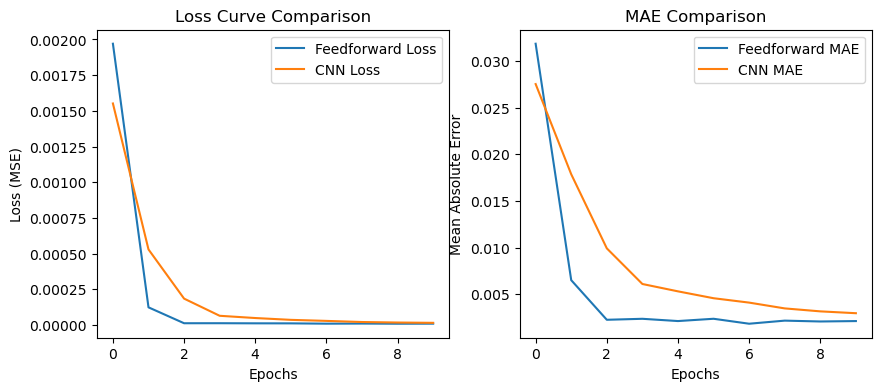

In [14]:
# Plot loss curves for both models
plt.figure(figsize=(10, 4))

# Loss comparison
plt.subplot(1, 2, 1)
plt.plot(feedforward_history.history["loss"], label="Feedforward Loss")
plt.plot(cnn_history.history["loss"], label="CNN Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss (MSE)")
plt.title("Loss Curve Comparison")
plt.legend()

# MAE comparison
plt.subplot(1, 2, 2)
plt.plot(feedforward_history.history["mae"], label="Feedforward MAE")
plt.plot(cnn_history.history["mae"], label="CNN MAE")
plt.xlabel("Epochs")
plt.ylabel("Mean Absolute Error")
plt.title("MAE Comparison")
plt.legend()

plt.show()